In this notebook, I will develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.random.rand(50)
X

array([0.76690138, 0.33738976, 0.48683286, 0.08511629, 0.26343659,
       0.48116271, 0.68836257, 0.77473902, 0.71100101, 0.74279503,
       0.61148826, 0.40699081, 0.67968994, 0.65873296, 0.14536434,
       0.92848835, 0.78548506, 0.50163368, 0.67960531, 0.80356269,
       0.92742468, 0.76234412, 0.02683303, 0.19300746, 0.2269234 ,
       0.84711724, 0.86626315, 0.01165477, 0.50733015, 0.0118477 ,
       0.61293661, 0.55054462, 0.21401775, 0.01331051, 0.78581861,
       0.10268496, 0.77058004, 0.68344583, 0.98670292, 0.1501568 ,
       0.74819204, 0.47624523, 0.64096703, 0.07628971, 0.9039094 ,
       0.36781861, 0.94358151, 0.53490864, 0.82299521, 0.13557498])

In [39]:
y = 5*X + np.random.rand(50)
y

array([4.6930347 , 2.20022244, 3.29725115, 0.59119258, 1.4036258 ,
       2.71638977, 4.01027009, 4.67269301, 4.34385145, 4.18331851,
       3.60062543, 2.8374664 , 3.93296012, 3.34658518, 1.60437131,
       4.93999192, 4.91838862, 2.80449772, 4.02805982, 4.74222548,
       5.10700629, 4.32241558, 0.47781284, 1.5650433 , 1.65374278,
       4.89742452, 4.75993497, 0.27002173, 3.33988326, 0.4350356 ,
       3.65671495, 3.31947192, 1.9633787 , 1.05228652, 4.36572563,
       0.86199213, 4.51170896, 3.45080241, 5.89460044, 1.09702169,
       3.7628485 , 3.08554126, 3.28508061, 0.47897789, 5.09968752,
       2.02919616, 5.64277532, 2.96322462, 4.49235154, 0.71041563])

#### Plot your data points. 

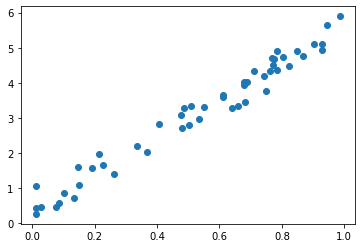

In [40]:
plt.scatter(X, y)

## 1- Adagrad

**Adagrad adapts the learning rate to the parameters, performing smaller updates(low learning rates) for parameters associated with frequently occurring features, and larger updates(high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data**

### For a single variable linear regression ML model, I will build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.Final Optimum values of Theta_0 and Theta_1.


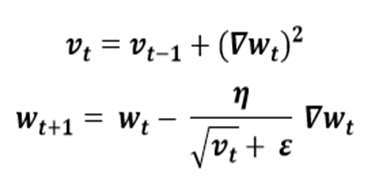

In [79]:
def adagrad_GD(x, y, alpha, epsilon, max_iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        gradient0 = (1/ m) * np.sum(error)
        vt0 = vt0 + gradient0**2
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epsilon))*gradient0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = vt1 + gradient1**2
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epsilon))*gradient1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.0001):
            print(f'it only took {i} iterations')
            break
            
    return all_thetas, all_costs, theta

In [115]:
alpha = 0.05
epsilon = 1e-8
max_iterations = 10000
all_thetas, all_costs, theta = adagrad_GD(X, y, alpha, epsilon, max_iterations)

it only took 1477 iterations


In [116]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.6888315100865998

Text(0.5, 1.0, 'cost vs. epochs')

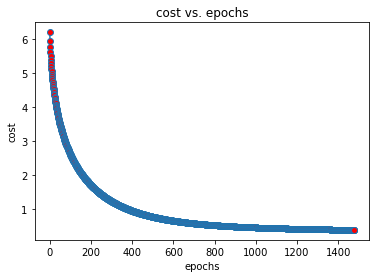

In [117]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('cost vs. epochs')

Text(0.5, 1.0, 'theta 0 vs. cost')

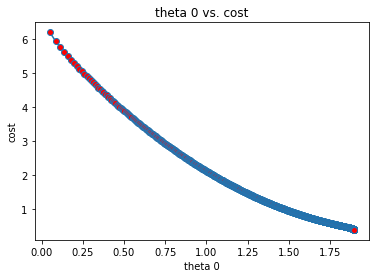

In [118]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs. cost')

Text(0.5, 1.0, 'theta 1 vs. cost')

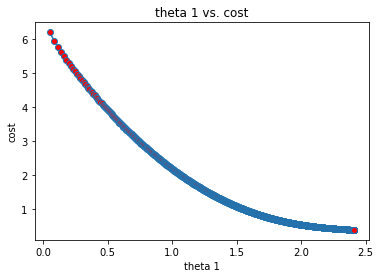

In [119]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs. cost')

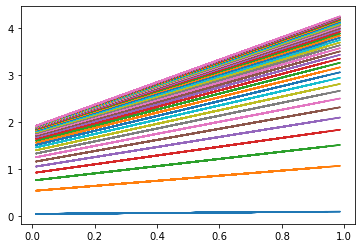

In [122]:
for i in range(0, len(all_thetas), 40):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

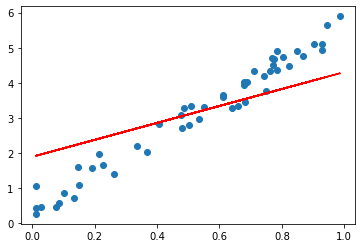

In [121]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

### so why the accuracy is low here?!!
**in adagrad we divide the learning rate by the accumulation root of the squared gradient. Initially this value is very low so the step of the update is big, but after many iterations this value become very large because it's the accumulation root of the squared gradient. and therefore the step become very low. this makes changing in the cost very low and this violates the stop condition I put in my implementaion and exit the loop.
I will solve this problem in the next 2 algorithms**

## 2- RMSProp

**As I implement adagrad. also I will implement the RMSProp gradient descent now.**

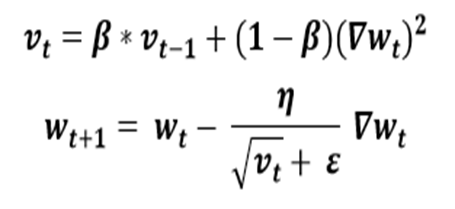

In [89]:
def RMSProp_GD(x, y, alpha, beta, epsilon, max_iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        gradient0 = (1/ m) * np.sum(error)
        vt0 = beta*vt0 + (1-beta)*gradient0**2
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epsilon))*gradient0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = beta*vt1 + (1-beta)*gradient1**2
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epsilon))*gradient1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.0001):
            print(f'it only took {i} iterations')
            break
            
    return all_thetas, all_costs, theta

In [123]:
alpha = 0.01
beta = 0.8
epsilon = 1e-8
max_iterations = 10000
all_thetas, all_costs, theta = RMSProp_GD(X, y, alpha, beta, epsilon, max_iterations)

it only took 526 iterations


In [124]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.9693297067575167

Text(0.5, 1.0, 'iterations vs cost')

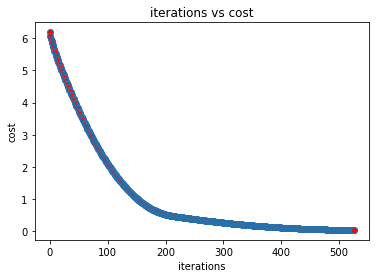

In [125]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('iterations vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

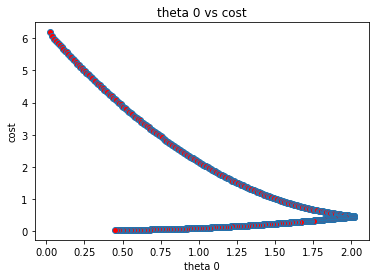

In [126]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

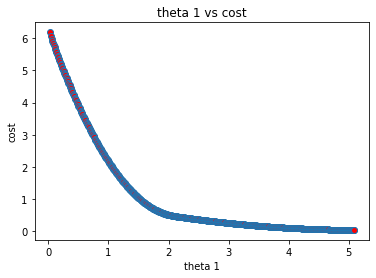

In [127]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

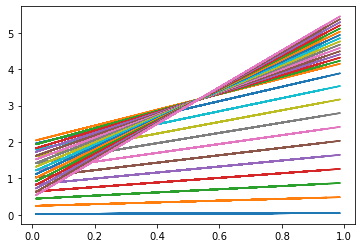

In [128]:
for i in range(0, len(all_thetas), 20):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

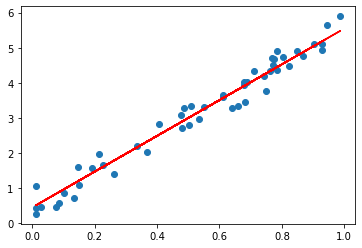

In [129]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')

**RMSProp solve problem we take about in the adagrad algorithm. because here we have $\beta\$ that makes me control in the accumulation part of the gradient, therefore I can reduce this accumulation and this makes the algorithm more faster.**

## Adam

**Now I will implement Adam gradient descent**

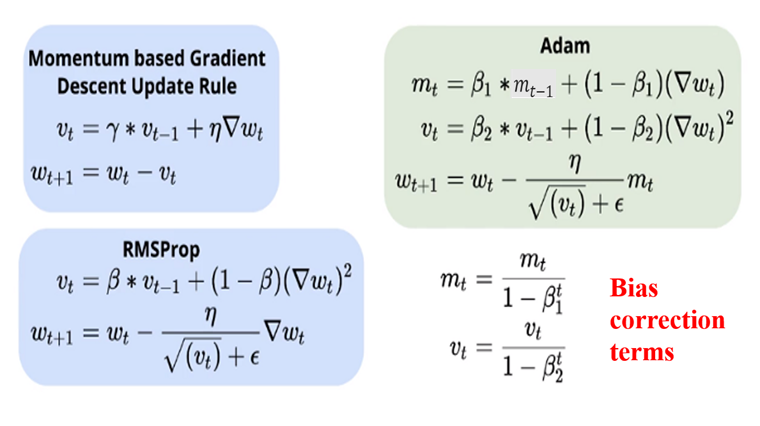

In [97]:
def Adam_GD(x, y, alpha, beta1, beta2, epsilon, max_iterations):
    m = len(x)
    # Empty list to store the cost for every iteration in.
    all_costs = []
    # Start with an initial guess that the weights are zeros.
    theta = np.zeros(2)
    # Empty list to store the weights for every iteration in.
    all_thetas = []
    # let vt0 and vt1 start with 0
    vt0, vt1 = 0, 0
    # let mt0 and mt1 start with 0
    mt0, mt1 = 0, 0
    for i in range(max_iterations):  
        # predict the output and calculate the error.      
        h = x*theta[1] + theta[0]
        error = h - y
        
        # calculate the cost store it in the 'all_costs' list
        cost = np.sum(np.power(error, 2)) / (2 * m)
        all_costs.append(cost)

        # calculate the gradient for each weight and update them.
        gradient0 = (1/ m) * np.sum(error)
        vt0 = beta2*vt0 + (1-beta2)*gradient0**2
        # bais correction terms
        vt0 = vt0/(1-(beta2)**(i+1))
        
        mt0 = beta1*mt0 + (1-beta1)*gradient0
        # bais correction terms
        mt0 = mt0/(1-(beta1)**(i+1))
        
        theta[0] = theta[0] - (alpha/(np.sqrt(vt0)+epsilon))*mt0

        gradient1 =  (1/ m) * np.sum(error*x)
        vt1 = beta2*vt1 + (1-beta2)*gradient1**2
        # bais correction terms
        vt1 = vt1/(1-beta2**(i+1))
        
        mt1 = beta1*mt1 + (1-beta1)*gradient1
        # bais correction terms
        mt1 = mt1/(1-(beta2)**(i+1))
        
        theta[1] = theta[1] - (alpha/(np.sqrt(vt1)+epsilon))*mt1

        # store the weights in the 'all_thetas' list
        all_thetas.append(theta.copy())
    
        # here is the stop condition. if the gradient or the change in the cost become very small, 
        # then no need to complete the maximum iteration.
        gradient = np.linalg.norm((gradient0, gradient1), 2)
        cost_change = (all_costs[i-1] - all_costs[i])

        if gradient < 0.01 or (i > 1 and cost_change < 0.0001):
            print(f'it only took {i} iterations')
            break
            
    return all_thetas, all_costs, theta

In [98]:
alpha = 0.01
beta1 = 0.8
beta2 = 0.8
epslon = 1e-8
max_iterations = 10000
all_thetas, all_costs, theta = Adam_GD(X, y, alpha, beta1, beta2, epsilon, max_iterations)

it only took 482 iterations


In [99]:
y_pred = theta[0] + theta[1]*X

# calculate r2 score
r2_score(y, y_pred)

0.9695325781993863

Text(0.5, 1.0, 'iterations vs cost')

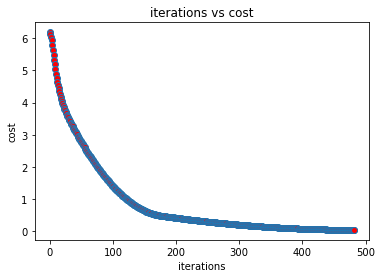

In [100]:
plt.plot(np.arange(len(all_costs)), all_costs, marker='o', markerfacecolor='r')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('iterations vs cost')

Text(0.5, 1.0, 'theta 0 vs cost')

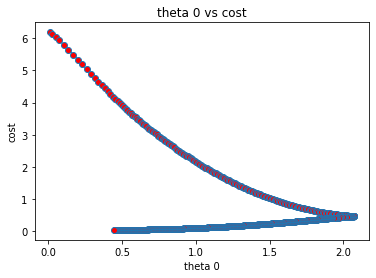

In [101]:
all_thetas = np.array(all_thetas)
plt.plot(all_thetas[:,0], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 0')
plt.ylabel('cost')
plt.title('theta 0 vs cost')

Text(0.5, 1.0, 'theta 1 vs cost')

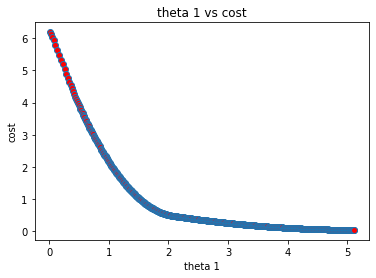

In [102]:
plt.plot(all_thetas[:,1], all_costs, marker='o', markerfacecolor='r')
plt.xlabel('theta 1')
plt.ylabel('cost')
plt.title('theta 1 vs cost')

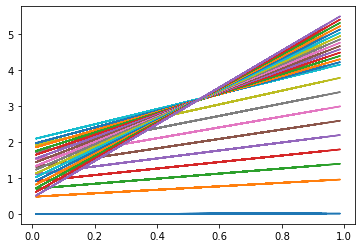

In [103]:
for i in range(0, len(all_thetas), 20):
    h = all_thetas[i][0] + X*all_thetas[i][1]
    plt.plot(X, h)
plt.show()

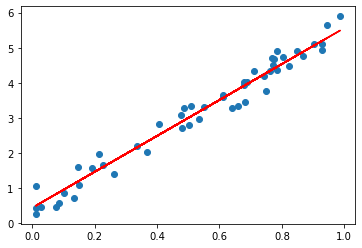

In [104]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')